Text(0, 0.5, 'z')

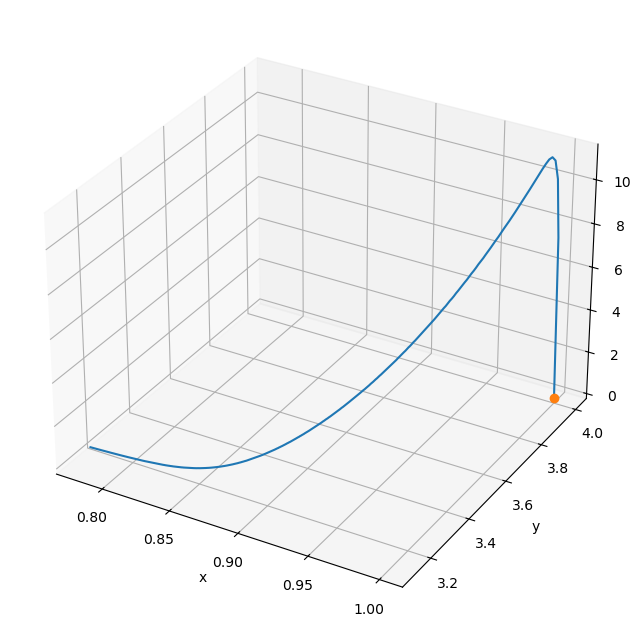

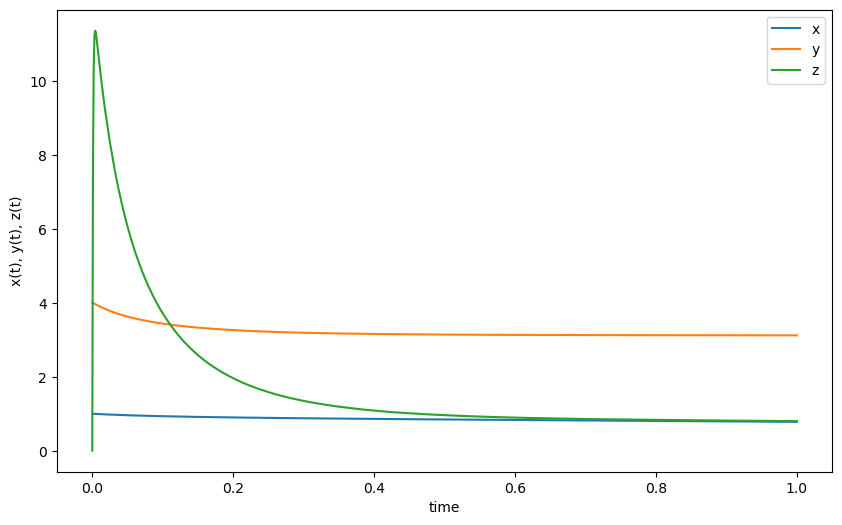

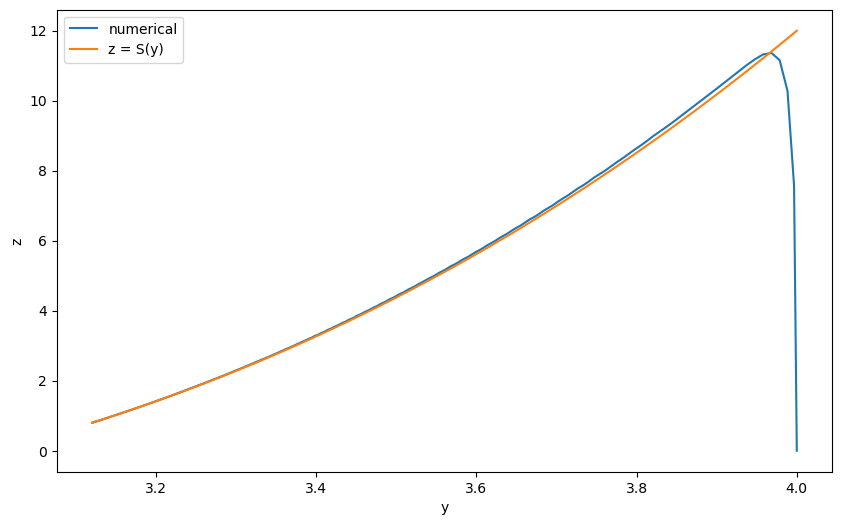

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

ep = 0.001;

# Slow manifold
S = lambda y: y*(y-3)*(y-1)
def f(t,Y):
    x, y, z = Y
    xp = 3 - y
    yp = x - z
    zp = (S(y) - z)/ep
    return [xp, yp, zp]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# # Plot an example solution
x0 = 1; y0 = 4; z0 = 0;
tstart = 0; tend = 1;
t = np.linspace(tstart, tend, 1000)
sol = solve_ivp(f, [tstart, tend], [x0,y0,z0], t_eval=t)

ax.plot(sol.y[0,:],sol.y[1,:], sol.y[2,:])
ax.plot(x0, y0, z0, 'o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


# ax2.plot(sol.t, sol.y[0,:])
# ax2.plot(sol.t, sol.y[1,:])
# ax2.set(xlabel='t', ylabel='x, y');

fig2, ax2 = plt.subplots(1,1, figsize=(10, 6))
# ax2 = fig.add_subplot(1,1);
ax2.plot(sol.t, sol.y[0,:], label='x')
ax2.plot(sol.t, sol.y[1,:], label='y')
ax2.plot(sol.t, sol.y[2,:], label='z')
ax2.legend()
ax2.set_xlabel('time'); ax2.set_ylabel('x(t), y(t), z(t)'); 

fig3, ax3 = plt.subplots(1,1, figsize=(10, 6))
# ax2 = fig.add_subplot(1,1);
ax3.plot(sol.y[1,:], sol.y[2,:], label='numerical')
ax3.plot(sol.y[1,:], S(sol.y[1,:]), label='z = S(y)')
ax3.legend()
ax3.set_xlabel('y')
ax3.set_ylabel('z')